# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set Display Options for Better Readability


In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.float_format', '{:.2f}'.format)

# Load the cleaned dataset

In [3]:
df = pd.read_csv('customer_churn_cleaned.csv')
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


## Split dataset into churned and non-churned

In [4]:
df_churned = df[df['Exited']==1]
df_nonchurn = df[df['Exited']==0]

print(f"Total records: {len(df)}")
print(f"churned customers: {len(df_churned)}")
print(f"nonchurned customers: {len(df_nonchurn)}")

Total records: 10000
churned customers: 2038
nonchurned customers: 7962


## Visualize Churn Distribution

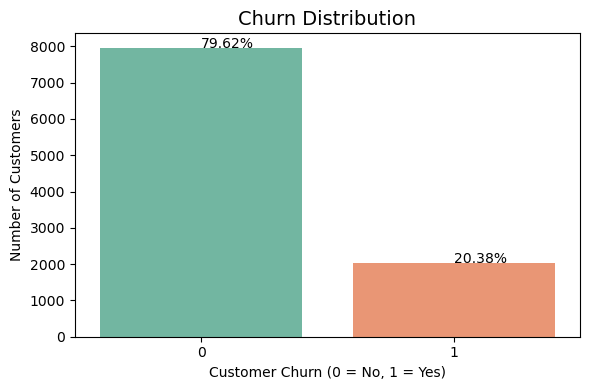

In [5]:
# 📊 Step 5: Visualize Churn Distribution
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='Exited', hue='Exited', palette='Set2', legend=False)
plt.title("Churn Distribution", fontsize=14)
plt.xlabel("Customer Churn (0 = No, 1 = Yes)")
plt.ylabel("Number of Customers")

# Annotate percentages on bars
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.2f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), fontsize=10)

plt.tight_layout()
plt.show()


# Demographic Analysis

## Churn Rate by Gender

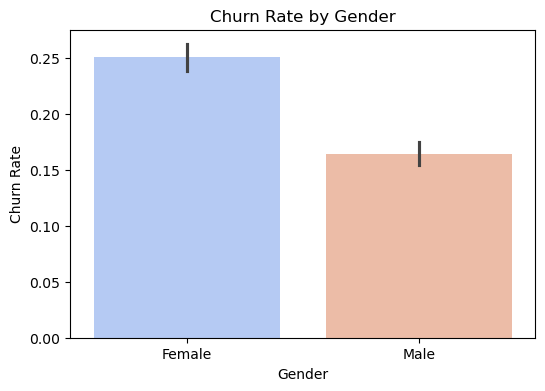

In [6]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='Gender', hue='Gender', y='Exited', palette='coolwarm')
plt.title('Churn Rate by Gender')
plt.ylabel('Churn Rate')
plt.show()


## Churn Rate by Age Group 

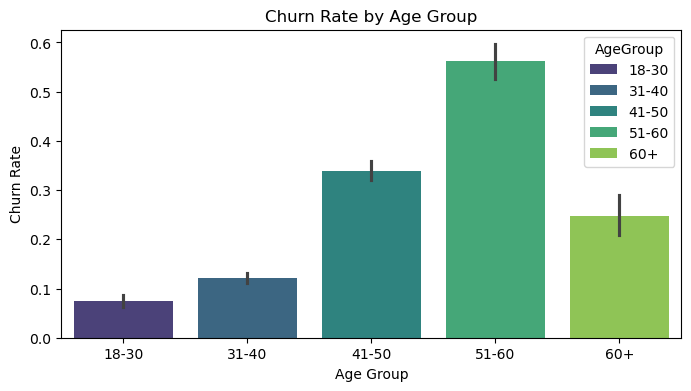

AgeGroup
18-30   0.08
31-40   0.12
41-50   0.34
51-60   0.56
60+     0.25
Name: Exited, dtype: float64


In [11]:
age_bins = [18, 30, 40, 50, 60, 100]
age_labels = ['18-30', '31-40', '41-50', '51-60', '60+']
df['AgeGroup'] = pd.cut(df['Age'], bins = age_bins, labels = age_labels)

plt.figure(figsize=(8,4))
sns.barplot(data=df, x='AgeGroup', y='Exited', hue='AgeGroup', palette='viridis')
plt.title('Churn Rate by Age Group')
plt.ylabel('Churn Rate')
plt.xlabel('Age Group')
plt.show()

print(df.groupby('AgeGroup', observed='False')['Exited'].mean())

## Churn Rate by Geography

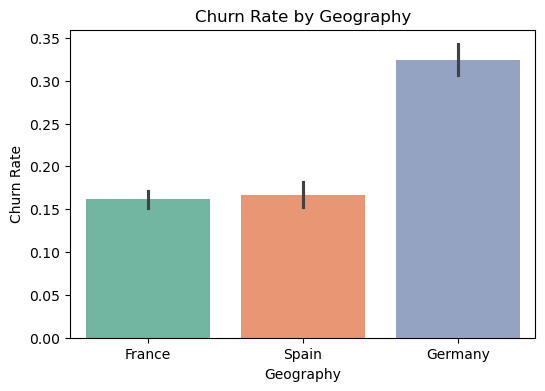

Geography
France    0.16
Germany   0.32
Spain     0.17
Name: Exited, dtype: float64


In [17]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='Geography', y='Exited', hue='Geography', palette='Set2')
plt.title('Churn Rate by Geography')
plt.ylabel('Churn Rate')
plt.show()

print(df.groupby('Geography')['Exited'].mean())

## Credit Score Distribution by Churn

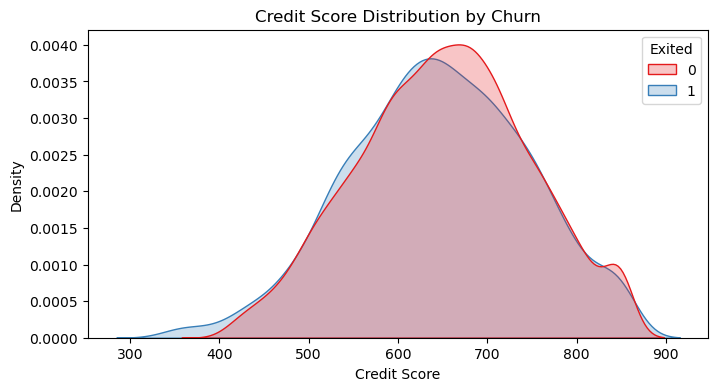

In [20]:
plt.figure(figsize=(8, 4))
sns.kdeplot(data=df, x='CreditScore', hue='Exited', fill=True, common_norm=False, palette='Set1')
plt.title("Credit Score Distribution by Churn")
plt.xlabel("Credit Score")
plt.ylabel("Density")
plt.show()

## Balance vs Churn

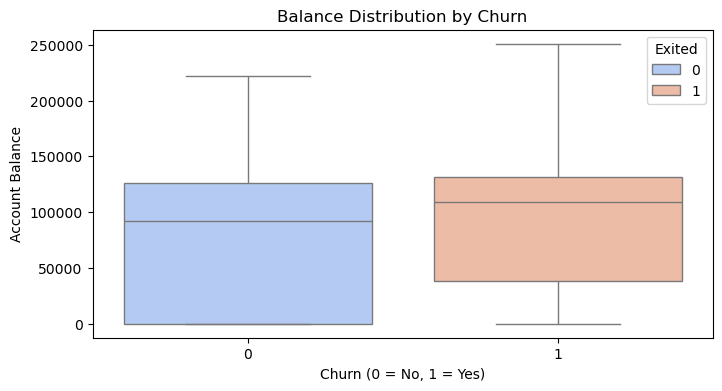

In [21]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Exited', y='Balance', hue='Exited', palette='coolwarm')
plt.title("Balance Distribution by Churn")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Account Balance")
plt.show()


## Estimated Salary vs Churn

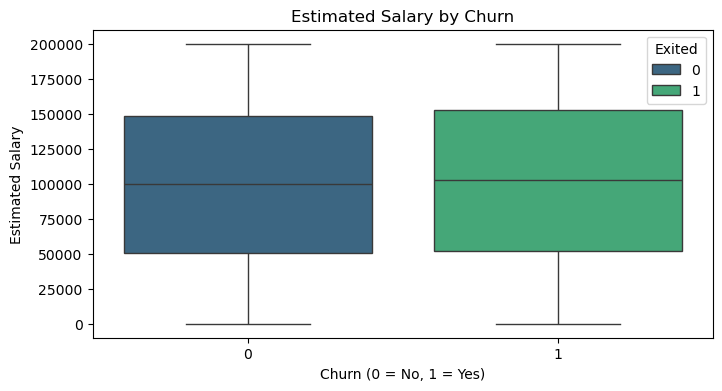

In [22]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Exited', y='EstimatedSalary', hue='Exited', palette='viridis')
plt.title("Estimated Salary by Churn")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Estimated Salary")
plt.show()


## Tenure vs Churn

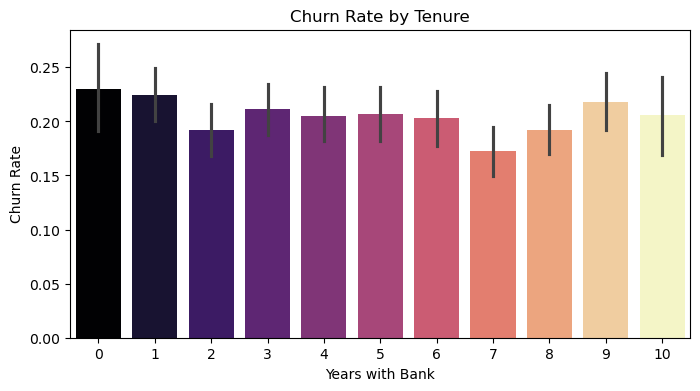

Tenure
0    0.23
1    0.22
2    0.19
3    0.21
4    0.21
5    0.21
6    0.20
7    0.17
8    0.19
9    0.22
10   0.21
Name: Exited, dtype: float64


In [29]:
plt.figure(figsize=(8, 4))
sns.barplot(data=df, x='Tenure', y='Exited',hue='Tenure', palette='magma')
plt.title("Churn Rate by Tenure")
plt.xlabel("Years with Bank")
plt.ylabel("Churn Rate")
plt.legend().remove()
plt.show()

print(df.groupby('Tenure')['Exited'].mean())


## IsActiveMember vs Churn

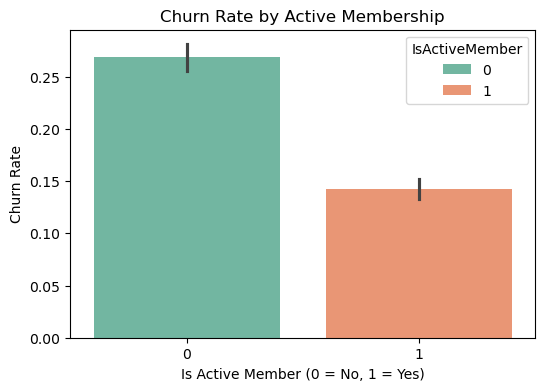

IsActiveMember
0   0.27
1   0.14
Name: Exited, dtype: float64


In [31]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='IsActiveMember', y='Exited', hue='IsActiveMember', palette='Set2')
plt.title("Churn Rate by Active Membership")
plt.xlabel("Is Active Member (0 = No, 1 = Yes)")
plt.ylabel("Churn Rate")
plt.show()

print(df.groupby('IsActiveMember')['Exited'].mean())